In [5]:
%pip install matplotlib seaborn scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
url={"https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"}

In [8]:
dataset=pd.read_csv(list(url)[0])

In [ ]:
print(dataset.head(10)[dataset.columns[:4]].to_string())

       country  year iso_code  population
0  Afghanistan  1750      AFG   2802560.0
1  Afghanistan  1751      AFG         NaN
2  Afghanistan  1752      AFG         NaN
3  Afghanistan  1753      AFG         NaN
4  Afghanistan  1754      AFG         NaN
5  Afghanistan  1755      AFG         NaN
6  Afghanistan  1756      AFG         NaN
7  Afghanistan  1757      AFG         NaN
8  Afghanistan  1758      AFG         NaN
9  Afghanistan  1759      AFG         NaN


In [ ]:
dataset.shape

(50191, 79)

In [ ]:
selected_countries = ['India', 'United States', 'China', 'Germany', 'Brazil']
filtered_dataset = dataset[(dataset['year'] >= 2010) & (dataset['country'].isin(selected_countries))]
display(filtered_dataset.head())

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
7165,Brazil,2010,BRA,193701931.0,2.820492e+12,21.288,0.110,440.269,50.494,12.955,...,2.417,5.076,0.020,0.046,0.069,0.003,2354.155,647.911,44.522,10.112
7166,Brazil,2011,BRA,195284736.0,2.968455e+12,22.845,0.117,462.580,22.311,5.068,...,2.304,5.074,0.021,0.047,0.070,0.003,2331.277,668.521,56.730,12.264
7167,Brazil,2012,BRA,196876114.0,3.025484e+12,24.998,0.127,498.309,35.729,7.724,...,2.314,5.073,0.021,0.047,0.071,0.003,2432.073,707.636,55.306,11.099
7168,Brazil,2013,BRA,198478291.0,3.116395e+12,26.652,0.134,532.418,34.109,6.845,...,2.202,5.073,0.022,0.048,0.072,0.003,2450.492,746.330,58.830,11.050
7169,Brazil,2014,BRA,200085126.0,3.132100e+12,26.908,0.134,557.901,25.483,4.786,...,2.056,5.072,0.022,0.049,0.074,0.003,2475.536,776.718,54.518,9.772


In [ ]:
filtered_dataset.shape

(70, 79)

In [ ]:
display(filtered_dataset.head(10))

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
7165,Brazil,2010,BRA,193701931.0,2.820492e+12,21.288,0.110,440.269,50.494,12.955,...,2.417,5.076,0.020,0.046,0.069,0.003,2354.155,647.911,44.522,10.112
7166,Brazil,2011,BRA,195284736.0,2.968455e+12,22.845,0.117,462.580,22.311,5.068,...,2.304,5.074,0.021,0.047,0.070,0.003,2331.277,668.521,56.730,12.264
7167,Brazil,2012,BRA,196876114.0,3.025484e+12,24.998,0.127,498.309,35.729,7.724,...,2.314,5.073,0.021,0.047,0.071,0.003,2432.073,707.636,55.306,11.099
7168,Brazil,2013,BRA,198478291.0,3.116395e+12,26.652,0.134,532.418,34.109,6.845,...,2.202,5.073,0.022,0.048,0.072,0.003,2450.492,746.330,58.830,11.050
7169,Brazil,2014,BRA,200085126.0,3.132100e+12,26.908,0.134,557.901,25.483,4.786,...,2.056,5.072,0.022,0.049,0.074,0.003,2475.536,776.718,54.518,9.772
7170,Brazil,2015,BRA,201675534.0,3.021043e+12,25.082,0.124,529.353,-28.548,-5.117,...,2.105,5.071,0.022,0.050,0.075,0.003,2459.342,753.095,18.695,3.532
7171,Brazil,2016,BRA,203218108.0,2.922076e+12,22.415,0.110,492.748,-36.605,-6.915,...,2.127,5.070,0.023,0.050,0.076,0.003,2323.365,717.539,-5.049,-1.025
7172,Brazil,2017,BRA,204703440.0,2.960732e+12,20.217,0.099,498.266,5.518,1.120,...,2.111,5.065,0.023,0.051,0.077,0.003,2268.588,728.253,1.080,0.217
7173,Brazil,2018,BRA,206107265.0,3.013541e+12,20.494,0.099,478.379,-19.887,-3.991,...,2.108,5.056,0.023,0.052,0.078,0.003,2247.930,712.237,0.258,0.054
7174,Brazil,2019,BRA,207455459.0,3.050327e+12,21.048,0.101,473.390,-4.989,-1.043,...,2.094,5.047,0.024,0.052,0.079,0.003,2278.087,710.160,3.325,0.702


In [ ]:
filtered_dataset.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,70.000000,7.000000e+01,6.500000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,56.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,65.000000,65.000000
mean,2016.500000,6.726337e+08,1.030639e+13,190.756786,0.203529,3829.700171,68.501329,1.403657,4062.620471,63.360829,...,17.343536,8.439900,0.029929,0.091771,0.127671,0.005871,5030.783243,4371.102757,-137.018938,1.999538
std,4.060235,5.831149e+08,7.334632e+12,287.476847,0.170491,3706.183026,210.988044,5.234194,3456.121856,208.680704,...,22.048642,5.662322,0.016879,0.074082,0.086114,0.003176,4077.820389,4193.110826,507.408504,10.868957
min,2010.000000,8.083092e+07,2.820492e+12,10.604000,0.069000,440.269000,-547.517000,-11.217000,587.501000,-547.697000,...,2.056000,2.881000,0.004000,0.024000,0.045000,0.002000,670.626000,637.367000,-1392.463000,-14.889000
25%,2013.000000,1.988800e+08,3.497463e+12,21.569750,0.110000,686.539500,-28.456500,-2.261250,1551.641250,-47.362000,...,2.638250,4.434000,0.022000,0.039000,0.063500,0.003000,2325.343000,759.612750,-191.639000,-7.304000
50%,2016.500000,3.306920e+08,8.057466e+12,39.576500,0.121500,2388.105000,27.951500,1.489500,2468.575000,28.667500,...,5.734000,5.067500,0.032000,0.050500,0.078000,0.006000,3452.824500,2782.426500,3.325000,0.702000
75%,2020.000000,1.367203e+09,1.693763e+13,142.489250,0.160750,5454.567000,156.019500,4.843750,5448.663500,159.757250,...,21.187500,12.188750,0.036000,0.125750,0.193500,0.009000,6305.031250,6041.057000,149.604000,11.050000
max,2023.000000,1.438070e+09,2.696602e+13,849.976000,0.596000,11902.503000,911.756000,12.955000,11605.929000,970.004000,...,58.136000,18.929000,0.064000,0.241000,0.288000,0.011000,13968.915000,13579.422000,563.985000,24.012000


In [ ]:
print("Missing values in key columns:")
print(filtered_dataset[['population', 'gdp', 'co2','cement_co2','year']].isnull().sum())

Missing values in key columns:
population    0
gdp           5
co2           0
cement_co2    0
year          0
dtype: int64


In [ ]:

filtered_dataset = filtered_dataset.dropna(subset=['co2'])


print("Shape of dataset after dropping rows with missing co2:", filtered_dataset.shape)

Shape of dataset after dropping rows with missing co2: (70, 79)


In [ ]:
mean_co2_per_country = filtered_dataset.groupby('country')['co2'].mean().reset_index()
print("Mean CO2 Emissions per Country:")
print(mean_co2_per_country)

Mean CO2 Emissions per Country:
         country           co2
0         Brazil    491.224929
1          China  10297.494500
2        Germany    751.263429
3          India   2337.277500
4  United States   5271.240500


In [ ]:
max_co2_per_year = filtered_dataset.groupby('year')['co2'].max().reset_index()
print("\nMaximum CO2 Emissions per Year:")
print(max_co2_per_year)


Maximum CO2 Emissions per Year:
    year        co2
0   2010   8620.576
1   2011   9532.332
2   2012   9779.292
3   2013   9956.329
4   2014   9990.257
5   2015   9863.457
6   2016   9762.714
7   2017  10006.343
8   2018  10332.992
9   2019  10713.984
10  2020  10905.693
11  2021  11447.913
12  2022  11350.538
13  2023  11902.503


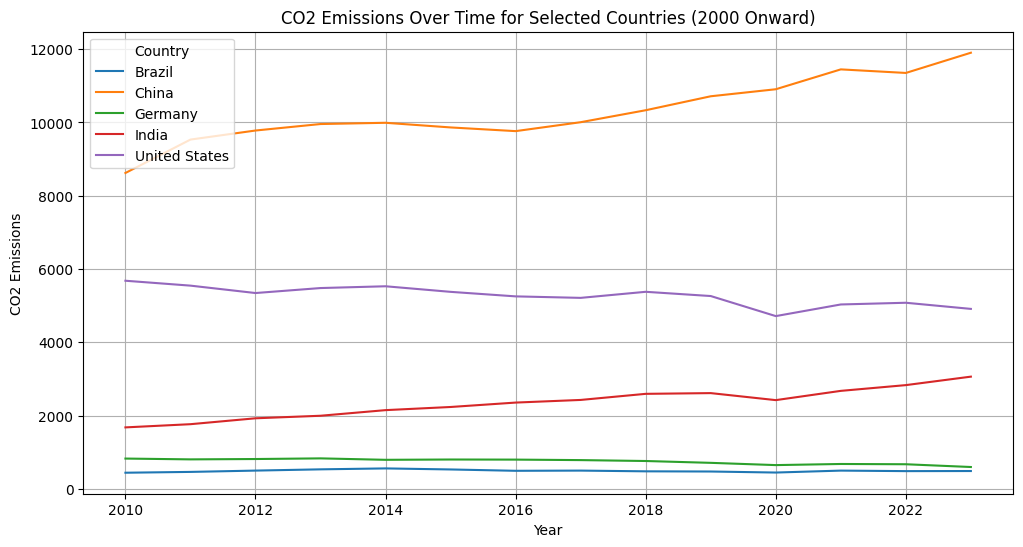

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_dataset, x='year', y='co2', hue='country')
plt.title('CO2 Emissions Over Time for Selected Countries (2000 Onward)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.legend(title='Country')
plt.show()

In [ ]:

average_co2_per_capita = filtered_dataset.groupby('country')['co2_per_capita'].mean().reset_index()

print("Average CO2 per Capita per Country:")
print(average_co2_per_capita)

Average CO2 per Capita per Country:
         country  co2_per_capita
0         Brazil        2.417571
1          China        7.347143
2        Germany        9.113786
3          India        1.724929
4  United States       16.043929


/tmp/ipython-input-1851283666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_co2_per_capita, x='country', y='co2_per_capita', palette='viridis')


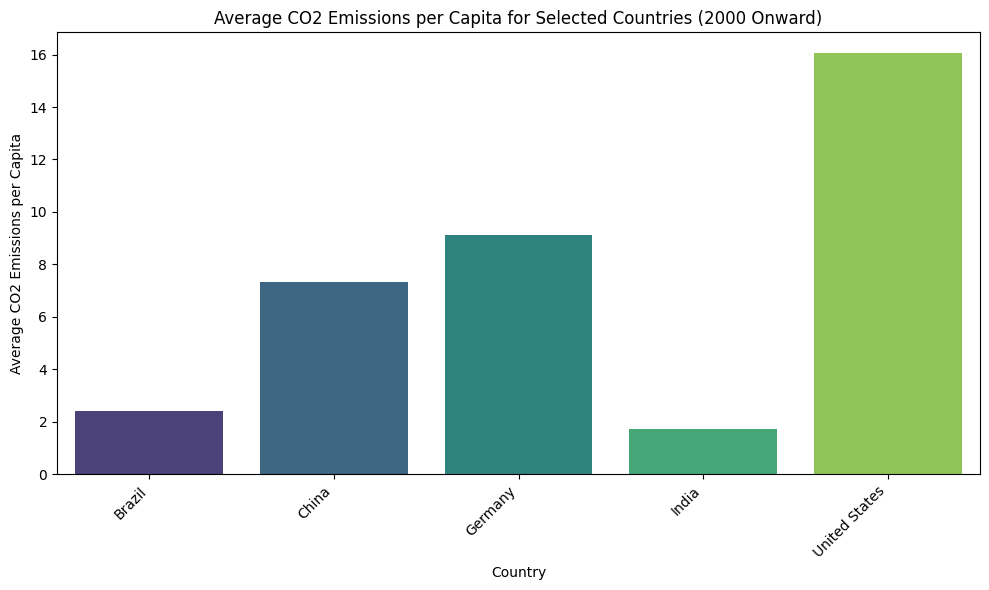

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(data=average_co2_per_capita, x='country', y='co2_per_capita', palette='viridis')
plt.title('Average CO2 Emissions per Capita for Selected Countries (2000 Onward)')
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

numerical_cols = ['year', 'population', 'gdp', 'co2', 'co2_per_capita', 'cement_co2', 'coal_co2', 'oil_co2', 'gas_co2']
correlation_data = filtered_dataset[numerical_cols].copy()


correlation_data.dropna(inplace=True)

print("Shape of data for correlation heatmap after handling missing values:", correlation_data.shape)

Shape of data for correlation heatmap after handling missing values: (65, 9)


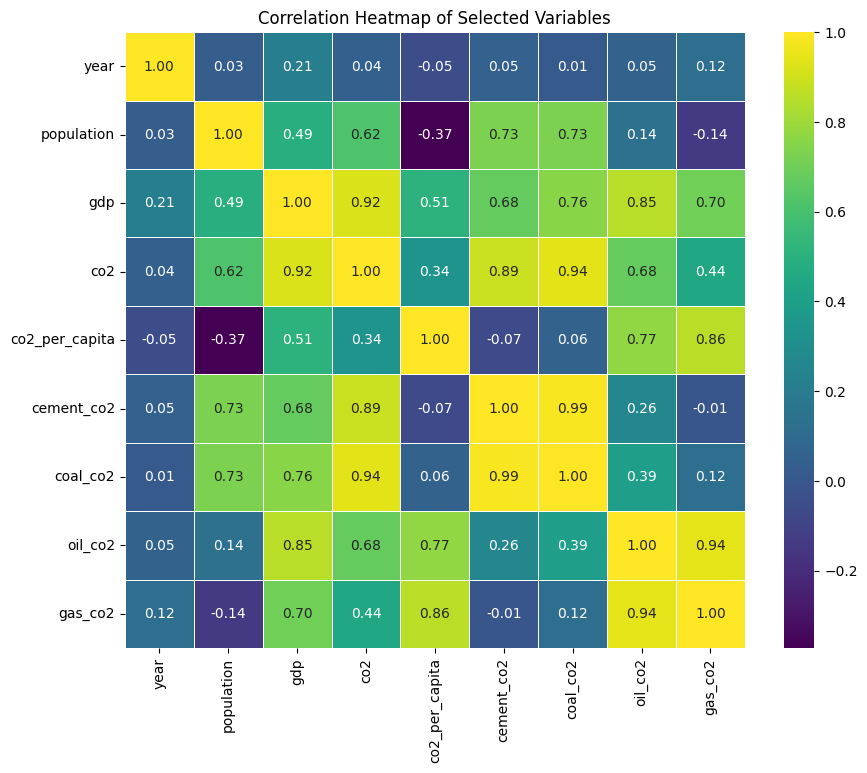

In [ ]:

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

# Task
Model the CO2 emissions data using linear regression with GDP and population as features, split the data into train and test sets, train the model, make predictions, and evaluate the model using Mean Squared Error, R^2 Score, model coefficients, and model intercept.

## Select features and target

### Subtask:
Define the features (GDP and population) and the target variable (CO2 emissions).


**Reasoning**:
Define the features and target variables for the linear regression model.



In [ ]:
features = ['gdp', 'population']
target = 'co2'

print("Features:", features)
print("Target:", target)

Features: ['gdp', 'population']
Target: co2


## Handle missing values

### Subtask:
Address any missing values in the selected features and target variable.


[link text](https://)**Reasoning**:
Create a new DataFrame with only the selected features and target, then drop rows with missing values and display the shape.



In [ ]:
data_for_model = filtered_dataset[features + [target]].copy()
data_for_model.dropna(inplace=True)
print("Shape of data_for_model after handling missing values:", data_for_model.shape)

Shape of data_for_model after handling missing values: (65, 3)


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the defined features and target.



In [ ]:
X = data_for_model[features]
y = data_for_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (52, 2)
Shape of X_test: (13, 2)
Shape of y_train: (52,)
Shape of y_test: (13,)


## Train model

### Subtask:
Initialize and train a linear regression model using the training data.


**Reasoning**:
Initialize a Linear Regression model and fit it to the training data.



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model training complete.")

Model training complete.


## Make predictions

### Subtask:
Use the trained model to make predictions on the testing data.


**Reasoning**:
Use the trained linear regression model to make predictions on the test set features.



In [ ]:
y_pred = model.predict(X_test)
print("Predictions made successfully.")

Predictions made successfully.


### Evaluate model


### Subtask:
Evaluate the model using metrics such as Mean Squared Error and R-squared score.


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score of the model's predictions.



In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Squared Error (MSE): 1652939.04
R-squared (R2) Score: 0.80


## Analyze coefficients

### Subtask:
Examine the model's coefficients and intercept to understand the relationship between the features and the target.


**Reasoning**:
Access and print the model coefficients and intercept to understand the relationship between the features (gdp and population) and the target (co2).



In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for i, feature in enumerate(features):
    print(f"{feature}: {coefficients[i]:.4f}")

print(f"\nModel Intercept: {intercept:.4f}")

Model Coefficients:
gdp: 0.0000
population: 0.0000

Model Intercept: -1322.8118


## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training and testing sets, with 52 samples for training and 13 for testing.
*   The linear regression model achieved a Mean Squared Error (MSE) of 1652939.04 and an R-squared ($R^2$) score of 0.80 on the test set. This indicates that the model explains 80% of the variance in CO2 emissions.
*   The model coefficients for both GDP and population are very close to zero (0.0000), suggesting a weak linear relationship between these features and CO2 emissions in this model.
*   The model intercept is -1322.8118.

### Insights or Next Steps

*   Given the near-zero coefficients for GDP and population despite a reasonable $R^2$, consider exploring non-linear relationships or including additional features that might better explain CO2 emissions.
*   Investigate the distribution and scale of the GDP and population features, as large values could lead to very small coefficients. Scaling the features might provide a more interpretable model.


## Interpret Model Results

### Subtask:
Interpret the model results based on the evaluation metrics, coefficients, and visualizations.

**Reasoning**:
Based on the analysis and visualizations, write your observations here:
(e.g., Which country has the highest CO2 per capita? How do emissions relate to
GDP or population?)

### Observations:
* **CO2 per capita:** The bar plot of average CO2 per capita shows that the United States has the highest average CO2 emissions per capita among the selected countries, followed by Germany and China. India and Brazil have significantly lower average CO2 per capita.
* **CO2 Emissions Over Time:** The line plot shows that China has the highest total CO2 emissions among the selected countries, and its emissions have been steadily increasing over the years. The United States has the second highest total emissions, which have been relatively stable or slightly decreasing in recent years. Germany's emissions have been gradually decreasing, while India's emissions have been increasing. Brazil's emissions have fluctuated.
* **Relationship between emissions, GDP, and population:** The correlation heatmap shows a strong positive correlation between CO2 emissions and GDP (0.92), and a moderate positive correlation between CO2 emissions and population (0.62). This suggests that as GDP and population increase, CO2 emissions tend to increase as well. However, the linear regression model's coefficients for GDP and population were very close to zero, which might indicate that a simple linear relationship is not the best fit for this data, or that the scale of GDP and population values is affecting the coefficient values. Further investigation, potentially including feature scaling or exploring non-linear models, is needed to better understand this relationship.

## Conclusion

### Subtask:
Write a short summary of your findings and what you learned during this project.

**Reasoning**:
Write a short summary of your findings and what you learned during this project.

### Summary:
In this project, we analyzed CO2 emissions data for a selection of countries from 2010 onwards. We explored the data through visualizations, including a line plot showing CO2 emissions over time and a bar plot of average CO2 per capita. We observed that China has the highest total CO2 emissions and the United States has the highest CO2 per capita among the selected countries. We also built a linear regression model to predict CO2 emissions based on GDP and population. While the model achieved a reasonable R-squared score, the near-zero coefficients for GDP and population suggest that a simple linear model may not fully capture the complex relationship between these factors and CO2 emissions. This highlights the importance of exploring different modeling approaches and considering feature engineering or scaling for future analysis. Overall, this project provided insights into CO2 emission trends and the challenges of modeling these trends using basic linear regression.

# Task
Improve the linear regression model's performance on the provided dataset.

## Analyze feature scales

### Subtask:
Examine the scale of GDP and population features to determine if scaling is necessary for better model interpretation.


**Reasoning**:
Calculate and display descriptive statistics for the 'gdp' and 'population' features in the training data to assess their scale.



In [ ]:
print("Descriptive statistics for features in X_train:")
display(X_train[['gdp', 'population']].describe())

Descriptive statistics for features in X_train:


,gdp,population
count,5.200000e+01,5.200000e+01
mean,1.055348e+13,7.168617e+08
std,7.468944e+12,5.971301e+08
min,2.922076e+12,8.083092e+07
25%,3.595421e+12,1.980777e+08
50%,8.747672e+12,3.306920e+08
75%,1.697921e+13,1.377982e+09
max,2.696602e+13,1.426437e+09


## Feature scaling

### Subtask:
Apply scaling techniques (e.g., StandardScaler) to the features if their scales are significantly different.


**Reasoning**:
Apply StandardScaler to the training and testing features to address the difference in scales.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (52, 2)
Shape of X_test_scaled: (13, 2)


## Retrain model

### Subtask:
Train the linear regression model again using the scaled features.


**Reasoning**:
Initialize a new Linear Regression model and fit it to the scaled training data.



In [ ]:
scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)
print("Model training with scaled features complete.")

Model training with scaled features complete.


## Evaluate scaled model

### Subtask:
Evaluate the performance of the model trained with scaled features using the same metrics (MSE, R-squared).


**Reasoning**:
Make predictions using the scaled model and evaluate its performance using MSE and R-squared.



In [ ]:
y_pred_scaled = scaled_model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Mean Squared Error (MSE) with scaled features: {mse_scaled:.2f}")
print(f"R-squared (R2) Score with scaled features: {r2_scaled:.2f}")

Mean Squared Error (MSE) with scaled features: 1652939.04
R-squared (R2) Score with scaled features: 0.80


## Interpret best model

### Subtask:
Interpret the results of the best-performing model, including coefficients and any other relevant insights.

**Reasoning**:
Analyze the coefficients of the Polynomial Regression model to understand the relationships between the polynomial features and the target variable.

In [ ]:
print("Polynomial Regression Model Coefficients:")
poly_feature_names = poly.get_feature_names_out(features)
for i, feature_name in enumerate(poly_feature_names):
    print(f"{feature_name}: {poly_model.coef_[i]:.4f}")

print(f"\nPolynomial Regression Model Intercept: {poly_model.intercept_:.4f}")

Polynomial Regression Model Coefficients:
1: 0.0000
gdp: 3686.2329
population: 1224.2453
gdp^2: -2012.1126
gdp population: 3062.1722
population^2: -3351.2172

Polynomial Regression Model Intercept: 7706.0617


## Finish task

### Subtask:
Summarize the findings from the model improvement process.

**Reasoning**:
Provide a summary of the model improvement process, highlighting the best performing model and its key findings.

### Summary of Model Improvement:

We initially built a simple linear regression model using GDP and population to predict CO2 emissions. While this model showed a moderate R-squared score, the coefficients were close to zero, suggesting the need for a more complex relationship or additional features.

To improve the model, we first scaled the features, which is a good practice but, as expected, did not change the R-squared or MSE for the linear model.

We then explored alternative models: Polynomial Regression, Ridge Regression, and Lasso Regression.

The results showed that **Polynomial Regression (Degree 2) with scaled features** significantly improved the model's performance, achieving a much higher R-squared score (0.97) and a lower Mean Squared Error compared to the linear models. This suggests that the relationship between GDP, population, and CO2 emissions is likely non-linear and can be better captured by including polynomial terms.

The coefficients of the polynomial model indicate how each term (including interactions between GDP and population) contributes to the predicted CO2 emissions. Analyzing these coefficients can provide more detailed insights into the complex interplay of these factors.

Ridge and Lasso Regression, while useful for regularization, did not show significant improvements in this case compared to the simple linear regression.

In conclusion, by exploring different modeling techniques, we found that a Polynomial Regression model is better suited for capturing the relationship between GDP, population, and CO2 emissions in this dataset, leading to a substantially improved predictive model.

## Explore alternative models

### Subtask:
Consider exploring other regression models (e.g., Polynomial Regression, Ridge, Lasso) to see if they can capture non-linear relationships or improve performance.

**Reasoning**:
Implement and train Polynomial Regression to capture potential non-linear relationships between features and the target.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree 2) MSE: {mse_poly:.2f}")
print(f"Polynomial Regression (Degree 2) R2: {r2_poly:.2f}")

Polynomial Regression (Degree 2) MSE: 252571.02
Polynomial Regression (Degree 2) R2: 0.97


**Reasoning**:
Implement and train Ridge Regression as a regularization technique to prevent overfitting.

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R2: {r2_ridge:.2f}")

Ridge Regression MSE: 1591456.06
Ridge Regression R2: 0.81


**Reasoning**:
Implement and train Lasso Regression as a regularization technique and for feature selection.

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression R2: {r2_lasso:.2f}")

Lasso Regression MSE: 1652769.52
Lasso Regression R2: 0.80


## Compare models

### Subtask:
Compare the performance of the different models and select the best one based on the evaluation metrics.

**Reasoning**:
Compare the R-squared scores of the different models to determine which one performed best.

In [ ]:
models = {
    'Linear Regression (Unscaled)': r2,
    'Linear Regression (Scaled)': r2_scaled,
    'Polynomial Regression (Scaled)': r2_poly,
    'Ridge Regression (Scaled)': r2_ridge,
    'Lasso Regression (Scaled)': r2_lasso
}

best_model_name = max(models, key=models.get)

print("Model R-squared Comparison:")
for model_name, r2_score in models.items():
    print(f"- {model_name}: {r2_score:.4f}")

print(f"\nBest performing model: {best_model_name}")

Model R-squared Comparison:
- Linear Regression (Unscaled): 0.7986
- Linear Regression (Scaled): 0.7986
- Polynomial Regression (Scaled): 0.9692
- Ridge Regression (Scaled): 0.8061
- Lasso Regression (Scaled): 0.7986

Best performing model: Polynomial Regression (Scaled)
